In [24]:
import os, glob
import pandas as pd
import numpy as np
import locale
from locale import atof

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import sklearn.metrics as metrics

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Extract Data

In [25]:
path = "C:/Users/iqbal/Desktop/Code/crunchbase test/Crunchbase Data"
all_files = glob.glob(os.path.join(path, "*.csv"))

data = pd.read_csv('./combined_csv.csv')

C:\Users\iqbal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (11,61,62,66,67,77) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [26]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
plt.rcParams["figure.figsize"] = (20,5)


In [27]:
data.head()

,Organization Name,Organization Name URL,Industries,Headquarters Location,CB Rank (Company),SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Monthly Visits Growth,SEMrush - Visit Duration,SEMrush - Page Views / Visit,Operating Status,Number of Articles,Headquarters Regions,Estimated Revenue Range,Founded Date,Founded Date Precision,Exit Date,Exit Date Precision,Closed Date,Closed Date Precision,Company Type,Investment Stage,Industry Groups,Number of Founders,Founders,Number of Employees,Number of Funding Rounds,Funding Status,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Funding Type,Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD),Last Equity Funding Type,Total Equity Funding Amount,Total Equity Funding Amount Currency,Total Equity Funding Amount Currency (in USD),Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Top 5 Investors,Number of Lead Investors,Number of Investors,Number of Acquisitions,Acquisition Status,IPO Status,IPO Date,Delisted Date,Delisted Date Precision,Money Raised at IPO,Money Raised at IPO Currency,Money Raised at IPO Currency (in USD),Valuation at IPO,Valuation at IPO Currency,Valuation at IPO Currency (in USD),Stock Symbol,Stock Symbol URL,Stock Exchange,IPqwery - Patents Granted,IPqwery - Trademarks Registered,IPqwery - Most Popular Patent Class,IPqwery - Most Popular Trademark Class,Investor Type,Accelerator Program Type,Accelerator Duration (in weeks),Acquisition Type,SEMrush - Visit Duration Growth,SEMrush - Page Views / Visit Growth,SEMrush - Bounce Rate,SEMrush - Bounce Rate Growth,SEMrush - Global Traffic Rank,SEMrush - Monthly Rank Change (#),SEMrush - Monthly Rank Growth,BuiltWith - Active Tech Count,G2 Stack - Total Products Active,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD)
0,Replicant,https://www.crunchbase.com/organization/replic...,"Artificial Intelligence, Information Services,...","San Francisco, California, United States","1,000",NaN,NaN,NaN,NaN,NaN,Active,4,"San Francisco Bay Area, West Coast, Western US",$1M to $10M,2017-01-01,year,NaN,NaN,NaN,NaN,For Profit,NaN,"Artificial Intelligence, Data and Analytics, I...",3.0,"Andrew Abraham, Benjamin Gleitzman, Gadi Shamia",11-50,3.0,Early Stage Venture,2020-09-10,27000000.0,USD,27000000.0,Series A,27000000.0,USD,27000000.0,Series A,35000000.0,USD,35000000.0,35000000.0,USD,35000000.0,"Norwest Venture Partners, Costanoa Ventures, B...",2.0,5.0,NaN,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,30,NaN,NaN,NaN
1,Dataminr,https://www.crunchbase.com/organization/dataminr,"Analytics, Artificial Intelligence, Enterprise...","New York, New York, United States","1,001","78,317","122,647.33",2.69%,"3,503",2.46,Active,185,"Greater New York Area, East Coast, Northeaster...",$50M to $100M,2009-01-01,year,NaN,NaN,NaN,NaN,For Profit,NaN,"Artificial Intelligence, Data and Analytics, G...",3.0,"Jeff Kinsey, Sam Hendel, Theodore Bailey",251-500,11.0,Late Stage Venture,2020-01-05,NaN,NaN,NaN,Secondary Market,391572500.0,USD,391572500.0,Series E,577012621.0,USD,577012621.0,577012621.0,USD,577012621.0,"Credit Suisse, BoxGroup, Wellington Management...",3.0,27.0,NaN,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,Computing; Calculating,Scientific and technological services,NaN,NaN,NaN,NaN,-50.45%,-31.3%,60.04%,-0.52%,"305,252","-1,264",-0.41%,52.0,37,2934192.0,USD,2934192.0
2,Recorded Future,https://www.crunchbase.com/organization/record...,"Analytics, Cyber Security, Machine Learning, R...","Somerville, Massachusetts, United States","1,002","163,982","169,072.33",12.49%,625,1.22,Active,402,"Greater Boston Area, East Coast, New England",$1M to $10M,2009-01-01,year,2019-05-30,day,NaN,NaN,For Profit,NaN,"Artificial Intelligence, Data and Analytics, I

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153256 entries, 0 to 153255
Data columns (total 81 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Organization Name                              153255 non-null  object 
 1   Organization Name URL                          153256 non-null  object 
 2   Industries                                     150875 non-null  object 
 3   Headquarters Location                          140502 non-null  object 
 4   CB Rank (Company)                              153256 non-null  object 
 5   SEMrush - Monthly Visits                       59505 non-null   object 
 6   SEMrush - Average Visits (6 months)            52198 non-null   object 
 7   SEMrush - Monthly Visits Growth                55562 non-null   object 
 8   SEMrush - Visit Duration                       59505 non-null   object 
 9   SEMrush - Page Views / Visit         

In [29]:
data.describe()

,SEMrush - Page Views / Visit,Number of Founders,Number of Funding Rounds,Last Funding Amount,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency (in USD),Total Equity Funding Amount,Total Equity Funding Amount Currency (in USD),Total Funding Amount,Total Funding Amount Currency (in USD),Number of Lead Investors,Number of Investors,Number of Acquisitions,Money Raised at IPO,Money Raised at IPO Currency (in USD),Valuation at IPO,Valuation at IPO Currency (in USD),BuiltWith - Active Tech Count,Aberdeen - IT Spend,Aberdeen - IT Spend Currency (in USD)
count,59505.000000,95572.000000,115715.000000,1.009860e+05,1.009860e+05,9.273600e+04,9.273600e+04,1.001290e+05,1.001280e+05,1.097660e+05,1.097650e+05,56448.000000,88254.000000,13179.000000,2.348000e+03,2.348000e+03,1.420000e+03,1.420000e+03,138310.000000,2.110700e+04,2.110700e+04
mean,2.872548,1.847277,2.273188,2.453704e+08,1.994465e+07,2.058825e+08,1.643864e+07,2.075384e+08,2.749571e+07,2.385137e+08,3.341671e+07,1.733702,3.757835,4.079217,4.132929e+08,2.649868e+08,2.835866e+09,1.640049e+09,27.432731,2.193506e+07,2.193506e+07
std,5.242115,1.015553,1.870581,2.035526e+10,3.710427e+08,1.894404e+10,1.845099e+08,1.831216e+10,2.596477e+08,1.954193e+10,4.366545e+08,1.230391,4.205362,9.801255,2.620517e+09,1.039915e+09,1.569973e+10,5.202418e+09,22.913225,3.228889e+08,3.228889e+08
min,1.000000,0.000000,0.000000,2.500000e+02,8.200000e+01,5.000000e+02,8.200000e+01,1.000000e+00,3.520000e+02,1.000000e+00,3.520000e+02,0.000000,0.000000,0.000000,3.500000e+05,3.500000e+05,7.000000e+05,6.991440e+05,0.000000,1.000000e+00,1.000000e+00
25%,1.190000,1.000000,1.000000,4.000000e+05,3.550000e+05,5.000000e+05,4.486538e+05,6.131500e+05,5.073128e+05,5.300000e+05,4.999250e+05,1.000000,1.000000,1.000000,4.635000e+07,4.500000e+07,2.102550e+08,2.023241e+08,10.000000,3.323700e+04,3.323700e+04
50%,2.000000,2.000000,2.000000,2.000000e+06,1.550000e+06,2.400000e+06,1.750000e+06,3.000000e+06,2.405715e+06,3.000000e+06,2.251679e+06,1.000000,2.000000,2.000000,9.325000e+07,9.000000e+07,4.776875e+08,4.495709e+08,22.000000,1.137210e+05,1.137210e+05
75%,3.120000,2.000000,3.000000,1.000000e+07,6.801311e+06,1.000000e+07,7.186733e+06,1.558974e+07,1.110462e+07,1.508875e+07,1.100000e+07,2.000000,5.000000,3.000000,2.097750e+08,1.932500e+08,1.400000e+09,1.212318e+09,38.000000,6.477790e+05,6.477790e+05
max,356.830000,18.000000,41.000000,4.000000e+12,1.000000e+11,4.000000e+12,2.400000e+10,4.000000e+12,2.992950e+10,4.000000e+12,1.000000e+11,23.000000,108.000000,304.000000,8.800000e+10,2.560000e+10,4.051500e+11,1.040000e+11,279.000000,1.812905e+10,1.812905e+10


## Clean Data and Explore Data

In [30]:
dfMain = data[["Organization Name",'Number of Articles', 'Headquarters Regions',
               'Estimated Revenue Range', 'Industry Groups', 'Number of Founders', "Founded Date",
               'Number of Employees', 'Number of Funding Rounds',
               'Last Funding Amount Currency (in USD)', 
               'Last Equity Funding Amount Currency (in USD)',
               'Last Equity Funding Type',
               'Total Equity Funding Amount Currency (in USD)',
               'Total Funding Amount Currency (in USD)', 'Number of Lead Investors',
               'Number of Investors', 'BuiltWith - Active Tech Count', "SEMrush - Monthly Visits",
               'SEMrush - Average Visits (6 months)', "SEMrush - Visit Duration", "SEMrush - Page Views / Visit",
              ]]


dfMain=dfMain.dropna()

In [31]:
dfMain['Date 2'] = pd.to_datetime(dfMain["Founded Date"], errors="coerce")
dfMain["Date 3"] = pd.DatetimeIndex(dfMain["Date 2"]).year
dfMain["Years Active"] = 2020  - dfMain["Date 3"]

In [32]:
dfMain["Estimated Revenue Range"].value_counts()

$1M to $10M       5084
$10M to $50M      2302
Less than $1M     2204
$100M to $500M     663
$50M to $100M      568
$1B to $10B        142
$500M to $1B       135
$10B+               33
Name: Estimated Revenue Range, dtype: int64

In [43]:
dfMain["Estimated Revenue Range"].value_counts()
BigCompanies = dfMain.loc[dfMain["Estimated Revenue Range"] == "$10B+"]


In [48]:
dfMain["Headquarters Regions"].value_counts()

San Francisco Bay Area, West Coast, Western US                                         1484
European Union (EU)                                                                    1460
Greater New York Area, East Coast, Northeastern US                                     1119
Asia-Pacific (APAC)                                                                    1098
San Francisco Bay Area, Silicon Valley, West Coast                                      925
Greater Boston Area, East Coast, New England                                            542
Greater Los Angeles Area, West Coast, Western US                                        512
European Union (EU), Nordic Countries, Scandinavia                                      353
Asia-Pacific (APAC), Association of Southeast Asian Nations (ASEAN), Southeast Asia     292
Southern US                                                                             258
Latin America                                                                   

In [49]:
dfMain["Industry"].value_counts()

Commerce and Shopping               1310
Apps                                 864
Financial Services                   830
Artificial Intelligence              697
Data and Analytics                   660
Information Technology               625
Biotechnology                        605
Administrative Services              559
Consumer Electronics                 531
Advertising                          520
Health Care                          485
Hardware                             443
Education                            355
Community and Lifestyle              329
Content and Publishing               278
Clothing and Apparel                 275
Internet Services                    270
Energy                               168
Food and Beverage                    166
Agriculture and Farming              137
Gaming                               129
Other                                103
Media and Entertainment               87
Events                                79
Software        

In [34]:
#Remove Outliers
dfMain = dfMain[dfMain["Estimated Revenue Range"] != "$10B+"]


#Initialize empty columns
dfMain["Industry"]=np.nan
dfMain["Count"]=np.nan

# Get First value of Industry Group
dfMain["Industry"] = dfMain["Industry Groups"].str.split(',')
dfMain["Industry"] = dfMain["Industry"].apply(lambda x: x[0])

# Create Years Founded Variable
dfMain['Years Active'] = pd.to_datetime(dfMain["Founded Date"], errors="coerce")
dfMain["Years Active"] = pd.DatetimeIndex(dfMain["Years Active"]).year
dfMain["Years Active"] = 2020  - dfMain["Years Active"]
dfMain["Years Active"].fillna(10, inplace=True)


#Set Categorical and numeric variables
cat_vars = dfMain[["Headquarters Regions", "Industry", "Estimated Revenue Range", "Number of Employees",]]

num_vars = dfMain[['Number of Articles', 'Number of Founders', 'Number of Funding Rounds', 'Years Active',
                   'Last Funding Amount Currency (in USD)',
                   'Last Equity Funding Amount Currency (in USD)',
                   'Total Equity Funding Amount Currency (in USD)',
                   'Total Funding Amount Currency (in USD)', 'Number of Lead Investors',
                   'Number of Investors', 'BuiltWith - Active Tech Count', "SEMrush - Monthly Visits",
                   'SEMrush - Average Visits (6 months)', "SEMrush - Visit Duration", "SEMrush - Page Views / Visit"
                    ]]


#Apply One hot encode
ohe = OneHotEncoder()
transformed_cat_vars = ohe.fit_transform(cat_vars.astype(str))
feat_names = ohe.get_feature_names()


#Handle Headerquarters regions with low values
dfMain["Count"]=dfMain.groupby("Headquarters Regions").transform('count')
dfMain["Headquarters Regions"].loc[dfMain["Count"] < 20 ] = "Other"

#Remove commas from numbers
locale.setlocale(locale.LC_NUMERIC, '')
num_vars = num_vars.astype(str)
num_vars = num_vars.applymap(atof)



#scale numerical variables
scaled_num_vars = preprocessing.StandardScaler().fit_transform(num_vars)


# transformed_vars = pd.concat([num_vars, transformed_cat_vars], axis=1)

#Create Target Variable
targetValues = ["Series A", "Series B", "Series C", "Series D", "Series E", "Series F", 
                "Series G",  "Series H", "Series I", "Series J", "Post-IPO Equity"]

dfMain["Has Reached Series A"]=dfMain["Last Equity Funding Type"].isin(targetValues)

C:\Users\iqbal\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [50]:
scaled_num_vars

array([[ 0.05756426,  1.52923397,  0.38800399, ..., -0.01855721,
         0.22474861, -0.32802982],
       [-0.02559964,  1.52923397,  0.38800399, ..., -0.0188742 ,
        -0.06342542,  0.14717568],
       [ 0.10998272, -0.18782781, -0.37738319, ..., -0.01527725,
         0.32915949,  0.0383937 ],
       ...,
       [-0.04324046, -1.04635869, -0.76007677, ..., -0.01876694,
         0.57452507, -0.17535335],
       [-0.03895626,  0.67070308,  0.0053104 , ..., -0.01885173,
        -0.25345323, -0.13336732],
       [-0.04046833, -0.18782781, -0.76007677, ..., -0.01856182,
         0.53798126, -0.27077614]])

## Analyze Data

In [36]:
dfMain["Has Reached Series A"].value_counts()

True     6490
False    4608
Name: Has Reached Series A, dtype: int64

In [37]:
num_vars.corrwith(dfMain["Has Reached Series A"])

Number of Articles                              -0.007323
Number of Founders                               0.077417
Number of Funding Rounds                         0.114631
Years Active                                    -0.049818
Last Funding Amount Currency (in USD)            0.048748
Last Equity Funding Amount Currency (in USD)     0.032204
Total Equity Funding Amount Currency (in USD)    0.019229
Total Funding Amount Currency (in USD)           0.018138
Number of Lead Investors                         0.215619
Number of Investors                              0.222137
BuiltWith - Active Tech Count                    0.081618
SEMrush - Monthly Visits                         0.010303
SEMrush - Average Visits (6 months)              0.010361
SEMrush - Visit Duration                         0.035443
SEMrush - Page Views / Visit                     0.026032
dtype: float64

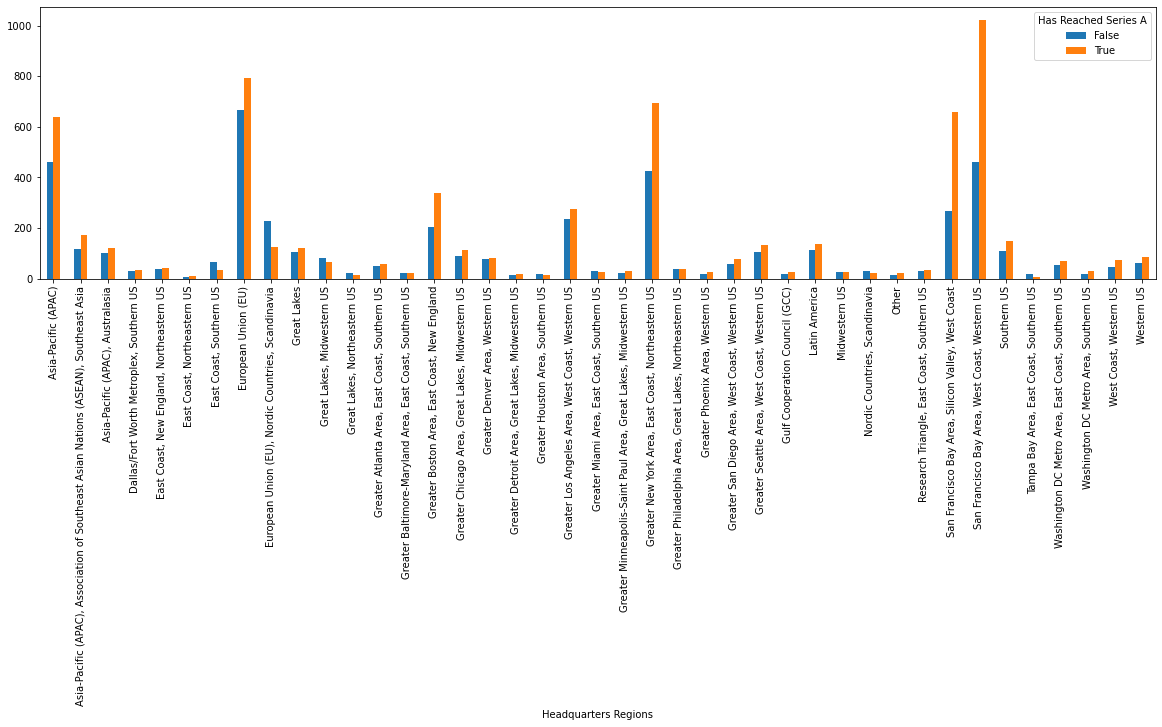

In [67]:
pd.crosstab(dfMain['Headquarters Regions'] ,dfMain["Has Reached Series A"]).plot(kind='bar')

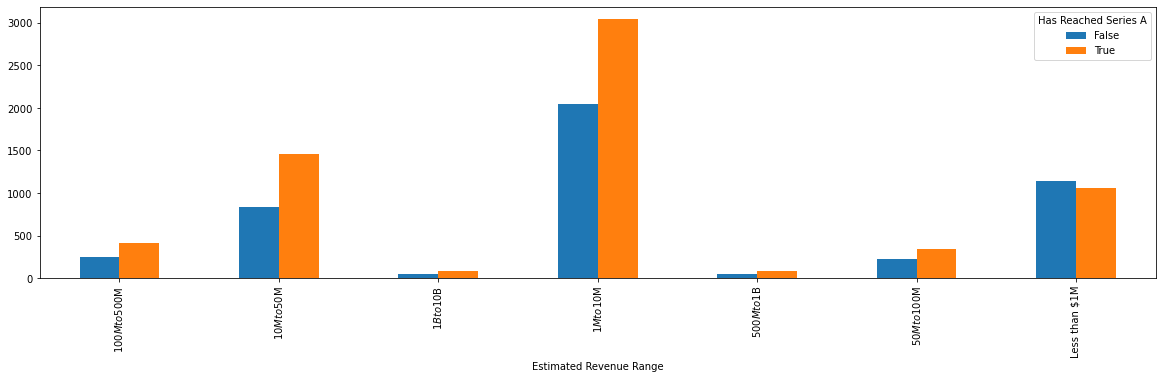

In [68]:
pd.crosstab(dfMain['Estimated Revenue Range'] ,dfMain["Has Reached Series A"]).plot(kind='bar')

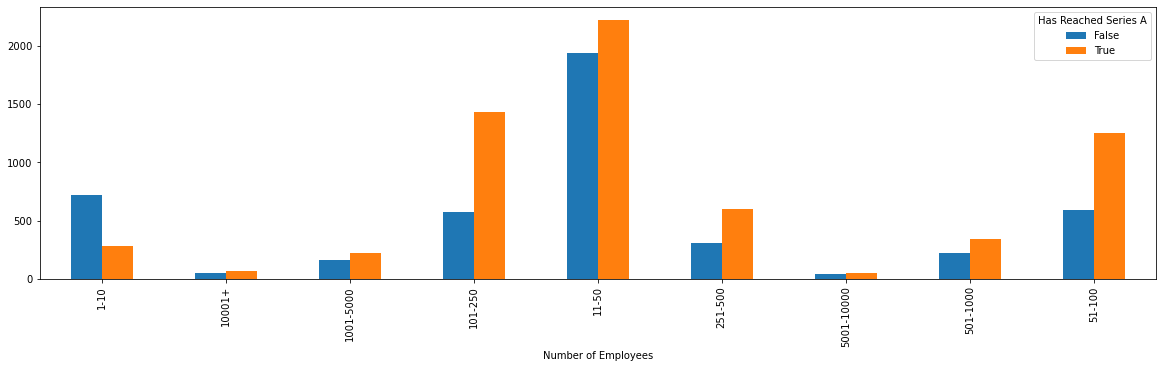

In [69]:
pd.crosstab(dfMain['Number of Employees'] ,dfMain["Has Reached Series A"]).plot(kind='bar')

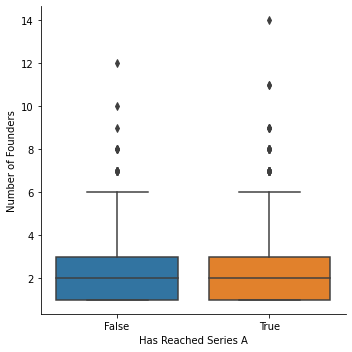

In [71]:
sns.catplot(x="Has Reached Series A", y="Number of Founders", kind="box", data=dfMain)

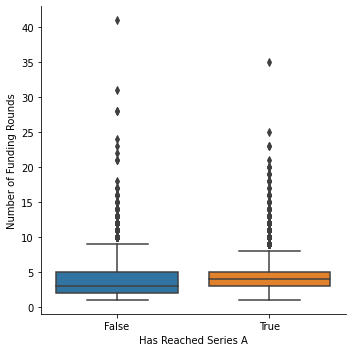

In [72]:
sns.catplot(x="Has Reached Series A", y="Number of Funding Rounds", kind="box", data=dfMain)

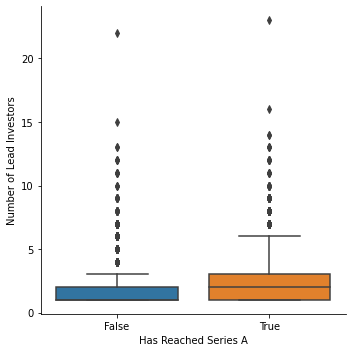

In [73]:
sns.catplot(x="Has Reached Series A", y="Number of Lead Investors", kind="box", data=dfMain)

## Predict Data

In [54]:
x = transformed_cat_vars
x2 = scaled_num_vars

y = dfMain["Has Reached Series A"]
x_train, x_test, y_train, y_test = train_test_split(x, y)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y)

In [53]:
clf = RandomForestClassifier().fit(x_train, y_train)

print(np.c_[feat_names, clf.feature_importances_])
print(pd.DataFrame({"Features":feat_names, "Importances":  clf.feature_importances_}).sort_values(by='Importances') )

[['x0_Asia-Pacific (APAC)' 0.02298131272442581]
 ['x0_Asia-Pacific (APAC), Association of Southeast Asian Nations (ASEAN), Southeast Asia'
  0.011859077047154509]
 ['x0_Asia-Pacific (APAC), Australasia' 0.011145268186472018]
 ['x0_Central America, Latin America' 6.750043047885874e-05]
 ['x0_Dallas/Fort Worth Metroplex, Southern US' 0.004341559424254767]
 ['x0_East Coast, New England, Northeastern US' 0.0053761747530351196]
 ['x0_East Coast, Northeastern US' 0.0019743817318976713]
 ['x0_East Coast, Southern US' 0.006688687843782798]
 ['x0_European Union (EU)' 0.023790633417929394]
 ['x0_European Union (EU), Nordic Countries, Scandinavia'
  0.013968104426754528]
 ['x0_Great Lakes' 0.009808511146453503]
 ['x0_Great Lakes, East Coast, Northeastern US' 0.001786024795334694]
 ['x0_Great Lakes, Midwestern US' 0.009064235349246509]
 ['x0_Great Lakes, Northeastern US' 0.003621306540062663]
 ['x0_Greater Atlanta Area, East Coast, Southern US' 0.00749422978690688]
 ['x0_Greater Baltimore-Maryland

In [56]:
clf = RandomForestClassifier().fit(x2_train, y2_train)
print(pd.DataFrame({"Features":num_vars.columns, "Importances":  clf.feature_importances_}).sort_values(by='Importances') )

                                         Features  Importances
1                              Number of Founders     0.023197
8                        Number of Lead Investors     0.032742
2                        Number of Funding Rounds     0.038956
13                       SEMrush - Visit Duration     0.052341
14                   SEMrush - Page Views / Visit     0.052704
9                             Number of Investors     0.055822
11                       SEMrush - Monthly Visits     0.057206
0                              Number of Articles     0.057652
12            SEMrush - Average Visits (6 months)     0.058618
10                  BuiltWith - Active Tech Count     0.059326
3                                    Years Active     0.076563
6   Total Equity Funding Amount Currency (in USD)     0.090206
7          Total Funding Amount Currency (in USD)     0.100873
4           Last Funding Amount Currency (in USD)     0.103505
5    Last Equity Funding Amount Currency (in USD)     0

In [60]:
df5 = pd.DataFrame({"Features": feat_names, "Coeff": np.exp(clf.coef_[0]) }) 
prediction = clf.predict(x_test)
print(accuracy_score(y_test, prediction))

0.6396396396396397


In [65]:
df5.sort_values(by="Coeff")

,Features,Coeff
95,x3_1-10,0.297347
9,"x0_European Union (EU), Nordic Countries, Scan...",0.473507
7,"x0_East Coast, Southern US",0.475742
76,x1_Navigation and Mapping,0.503272
11,"x0_Great Lakes, East Coast, Northeastern US",0.541936
13,"x0_Great Lakes, Northeastern US",0.542552
41,"x0_Tampa Bay Area, East Coast, Southern US",0.577972
56,x1_Consumer Goods,0.593272
36,"x0_Nordic Countries, Scandinavia",0.596598
12,"x0_Great Lakes, Midwestern US",0.610135


In [64]:
clf = LogisticRegression().fit(x2_train, y2_train)
print(pd.DataFrame({"Features": num_vars.columns.tolist(), "Coeff": np.exp(clf.coef_[0]) }) )
prediction = clf.predict(x2_test)
print(accuracy_score(y2_test, prediction))

                                         Features     Coeff
0                              Number of Articles  0.874373
1                              Number of Founders  1.064404
2                        Number of Funding Rounds  0.865582
3                                    Years Active  0.963760
4           Last Funding Amount Currency (in USD)  1.121737
5    Last Equity Funding Amount Currency (in USD)  1.172154
6   Total Equity Funding Amount Currency (in USD)  0.684010
7          Total Funding Amount Currency (in USD)  1.002564
8                        Number of Lead Investors  1.526942
9                             Number of Investors  1.573769
10                  BuiltWith - Active Tech Count  1.072530
11                       SEMrush - Monthly Visits  1.394395
12            SEMrush - Average Visits (6 months)  0.904452
13                       SEMrush - Visit Duration  1.071131
14                   SEMrush - Page Views / Visit  1.032734
0.6472072072072073


In [62]:
pd.set_option('display.max_rows', 105)

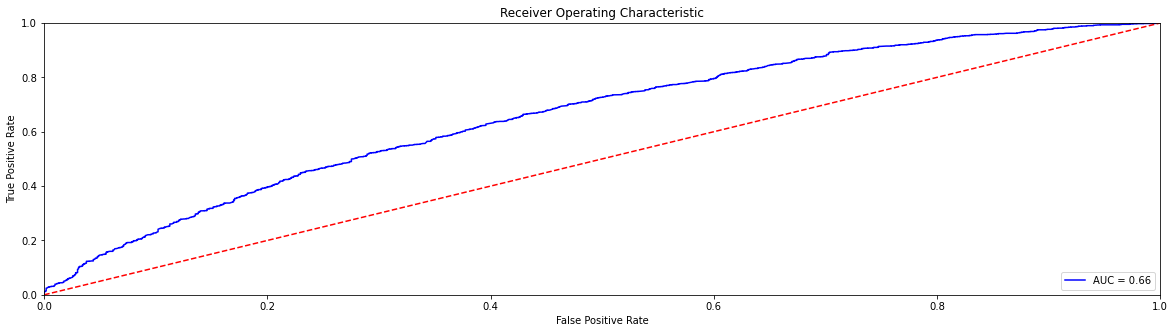

In [63]:
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()